# Import Data Using Pandas

In [1]:
import pandas
MyData=pandas.read_csv('http://scps.wmwikis.net/file/view/BrainData.csv/585887851/BrainData.csv')

RuntimeError: module compiled against API version a but this version of numpy is 9

In [2]:
MyData.tail()

,Participant,Age,Gender,Type,Region,Condition,ElapsedTime,PCRS_S,PCRS_O,BDI,Trial,RT,ACC
4995,100,49,Female,Vascular,Parietal,Choice,24,92,88,24,46,1109.9735,Correct
4996,100,49,Female,Vascular,Parietal,Choice,24,92,88,24,47,1117.5198,Correct
4997,100,49,Female,Vascular,Parietal,Choice,24,92,88,24,48,1299.3322,Correct
4998,100,49,Female,Vascular,Parietal,Choice,24,92,88,24,49,1021.5249,Correct
4999,100,49,Female,Vascular,Parietal,Choice,24,92,88,24,50,974.9603,Correct


In [3]:
MyData.Participant=MyData.Participant.astype('object')

In [4]:
MyData.describe(include='all')

,Participant,Age,Gender,Type,Region,Condition,ElapsedTime,PCRS_S,PCRS_O,BDI,Trial,RT,ACC
count,5000,5000.000000,5000,5000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000
unique,100,NaN,3,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2
top,100,NaN,Male,Vascular,Parietal,Choice,NaN,NaN,NaN,NaN,NaN,NaN,Correct
freq,50,NaN,2800,2850,2750,2500,NaN,NaN,NaN,NaN,NaN,NaN,4545
mean,NaN,49.150000,NaN,NaN,NaN,NaN,23.950000,82.140000,63.920000,37.970000,25.500000,1127.558790,NaN
std,NaN,14.332082,NaN,NaN,NaN,NaN,3.204614,21.124622,27.100563,14.849855,14.432313,576.212549,NaN
min,NaN,19.000000,NaN,NaN,NaN,NaN,17.000000,41.000000,16.000000,8.000000,1.000000,0.133550,NaN
25%,NaN,38.000000,NaN,NaN,NaN,NaN,22.000000,61.750000,39.000000,24.000000,13.000000,998.323450,NaN
50%,NaN,47.000000,NaN,NaN,NaN,NaN,24.000000,86.500000,74.500000,41.000000,25.500000,1085.455850,NaN
75%,NaN,60.000000,NaN,NaN,NaN,NaN,26.000000,99.000000,87.250000,48.250000,38.000000,1174.486850,NaN


In [5]:
CleanData=pandas.DataFrame()
ParticipantList=MyData['Participant'].unique()
for participant in ParticipantList:
    ThisPartData=MyData[MyData.Participant==participant]
    Q1=ThisPartData['RT'].quantile(.25)
    Q3=ThisPartData['RT'].quantile(.75)
    IQR=Q3-Q1
    LowBound=Q1-IQR*1.5
    UpBound=Q3+IQR*1.5
    ThisCleanPartData=ThisPartData[(ThisPartData.RT>LowBound)&(ThisPartData.RT<UpBound)]
    CleanData=CleanData.append(ThisCleanPartData)

In [6]:
CleanData.describe(include='all')

,Participant,Age,Gender,Type,Region,Condition,ElapsedTime,PCRS_S,PCRS_O,BDI,Trial,RT,ACC
count,4889,4889.000000,4889,4889,4889,4889,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889
unique,100,NaN,3,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2
top,100,NaN,Male,Vascular,Parietal,Choice,NaN,NaN,NaN,NaN,NaN,NaN,Correct
freq,50,NaN,2742,2783,2699,2448,NaN,NaN,NaN,NaN,NaN,NaN,4445
mean,NaN,49.182246,NaN,NaN,NaN,NaN,23.950501,82.170382,64.019022,37.902536,25.534465,1084.482232,NaN
std,NaN,14.311651,NaN,NaN,NaN,NaN,3.209030,21.099499,27.068098,14.847650,14.453325,120.751977,NaN
min,NaN,19.000000,NaN,NaN,NaN,NaN,17.000000,41.000000,16.000000,8.000000,1.000000,657.352200,NaN
25%,NaN,38.000000,NaN,NaN,NaN,NaN,22.000000,62.000000,39.000000,24.000000,13.000000,1000.493500,NaN
50%,NaN,47.000000,NaN,NaN,NaN,NaN,24.000000,87.000000,75.000000,41.000000,26.000000,1085.520700,NaN
75%,NaN,60.000000,NaN,NaN,NaN,NaN,26.000000,99.000000,88.000000,48.000000,38.000000,1171.644800,NaN


In [7]:
CleanData['Gender'].unique()

array(['Female', 'Male', 'Mail'], dtype=object)

In [8]:
#CleanData.Gender[CleanData.Gender=='Mail']='Male'
#CleanData.Gender.replace(to_replace=CleanData.Gender=='Mail',value='Male',inplace=True)
CleanData.Gender.replace({'Mail': 'Male'}, regex=True,inplace=True)
CleanData.head()

,Participant,Age,Gender,Type,Region,Condition,ElapsedTime,PCRS_S,PCRS_O,BDI,Trial,RT,ACC
0,1,43,Female,Traumatic,Frontal,Simple,22,71,23,64,1,1035.1506,Correct
1,1,43,Female,Traumatic,Frontal,Simple,22,71,23,64,2,1088.3679,Correct
2,1,43,Female,Traumatic,Frontal,Simple,22,71,23,64,3,1124.1570,Correct
3,1,43,Female,Traumatic,Frontal,Simple,22,71,23,64,4,1097.6923,Correct
4,1,43,Female,Traumatic,Frontal,Simple,22,71,23,64,5,1076.9956,Correct


In [9]:
test=CleanData['Gender'].value_counts()
print(test)

Male      2791
Female    2098
dtype: int64


In [10]:
CleanData.describe(include='all')

,Participant,Age,Gender,Type,Region,Condition,ElapsedTime,PCRS_S,PCRS_O,BDI,Trial,RT,ACC
count,4889,4889.000000,4889,4889,4889,4889,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889
unique,100,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2
top,100,NaN,Male,Vascular,Parietal,Choice,NaN,NaN,NaN,NaN,NaN,NaN,Correct
freq,50,NaN,2791,2783,2699,2448,NaN,NaN,NaN,NaN,NaN,NaN,4445
mean,NaN,49.182246,NaN,NaN,NaN,NaN,23.950501,82.170382,64.019022,37.902536,25.534465,1084.482232,NaN
std,NaN,14.311651,NaN,NaN,NaN,NaN,3.209030,21.099499,27.068098,14.847650,14.453325,120.751977,NaN
min,NaN,19.000000,NaN,NaN,NaN,NaN,17.000000,41.000000,16.000000,8.000000,1.000000,657.352200,NaN
25%,NaN,38.000000,NaN,NaN,NaN,NaN,22.000000,62.000000,39.000000,24.000000,13.000000,1000.493500,NaN
50%,NaN,47.000000,NaN,NaN,NaN,NaN,24.000000,87.000000,75.000000,41.000000,26.000000,1085.520700,NaN
75%,NaN,60.000000,NaN,NaN,NaN,NaN,26.000000,99.000000,88.000000,48.000000,38.000000,1171.644800,NaN


In [11]:
import numpy as np
CleanData['Awareness']=CleanData['PCRS_S']-CleanData['PCRS_O']
PartList=CleanData['Participant'].unique()
firstrun=0
for part in PartList:
    partdata=CleanData[CleanData.Participant==part]
    acccounts=partdata['ACC'].value_counts()
    if np.size(acccounts)==2:
        thisacc=round((float(acccounts[0])/float(acccounts[0]+acccounts[1]))*100)
    else:
        thisacc=100
    Nreps=np.size(partdata['ACC'],0)
    TileACC=np.tile(thisacc,Nreps)
    if firstrun==0:
        AllACC=TileACC
        firstrun=1
    else:
        AllACC=np.append(AllACC,TileACC)
        
CleanData['AllACC']=AllACC
    

In [12]:
CleanData.head()

,Participant,Age,Gender,Type,Region,Condition,ElapsedTime,PCRS_S,PCRS_O,BDI,Trial,RT,ACC,Awareness,AllACC
0,1,43,Female,Traumatic,Frontal,Simple,22,71,23,64,1,1035.1506,Correct,48,88
1,1,43,Female,Traumatic,Frontal,Simple,22,71,23,64,2,1088.3679,Correct,48,88
2,1,43,Female,Traumatic,Frontal,Simple,22,71,23,64,3,1124.1570,Correct,48,88
3,1,43,Female,Traumatic,Frontal,Simple,22,71,23,64,4,1097.6923,Correct,48,88
4,1,43,Female,Traumatic,Frontal,Simple,22,71,23,64,5,1076.9956,Correct,48,88


In [13]:
CleanData['Accuracy']=(CleanData.ACC=='Correct').astype(int)
CleanData.Accuracy.value_counts()

1    4445
0     444
dtype: int64

In [14]:
GroupedCleanData=CleanData.groupby(['Participant','Gender','Condition','Type','Region','ACC'],as_index=False).apply(np.mean)
#GroupedCleanDataWide=pandas.DataFrame()
#GroupedCleanDataRT=CleanData.pivot_table(index='Participant', columns=['Condition','ACC'], values=['RT'])
#GroupedCleanDataACC=CleanData.pivot_table(index='Participant', columns=['Condition'], values=['Accuracy'])
#GroupedCleanData=CleanData.pivot('Participant','Condition','RT')
GroupedCleanData.reset_index(inplace=True)
GroupedCleanData.head()

,Participant,Gender,Condition,Type,Region,ACC,Age,ElapsedTime,PCRS_S,PCRS_O,BDI,Trial,RT,Awareness,AllACC,Accuracy
0,1,Female,Choice,Traumatic,Frontal,Correct,43,22,71,23,64,38.047619,1216.395005,48,88,1
1,1,Female,Choice,Traumatic,Frontal,Incorrect,43,22,71,23,64,40.333333,1136.751400,48,88,0
2,1,Female,Simple,Traumatic,Frontal,Correct,43,22,71,23,64,12.954545,1124.938150,48,88,1
3,1,Female,Simple,Traumatic,Frontal,Incorrect,43,22,71,23,64,13.333333,1138.409967,48,88,0
4,2,Male,Choice,Traumatic,Parietal,Correct,46,30,123,84,58,37.666667,1194.548886,39,70,1


In [15]:
#GroupedCleanData['AllACC']=GroupedCleanData['AllACC'].round(1)
WideCleanData=GroupedCleanData.pivot_table(index=["Participant",'Gender','Type','Region','Age','ElapsedTime'
                                        ,'PCRS_S','PCRS_O','BDI','Awareness','AllACC'],columns=['Condition','ACC'],values=['RT'])
WideCleanData.reset_index(inplace=True)
WideCleanData.head()

Participant  Gender       Type    Region Age ElapsedTime PCRS_S  \
Condition                                                                   
ACC                                                                         
0                   1  Female  Traumatic   Frontal  43          22     71   
1                   2    Male  Traumatic  Parietal  46          30    123   
2                   3  Female   Vascular   Frontal  64          22     48   
3                   4    Male  Traumatic   Frontal  52          25     62   
4                   5    Male  Traumatic   Frontal  34          25     41   

          PCRS_O   BDI Awareness AllACC           RT               \
Condition                                     Choice                
ACC                                          Correct    Incorrect   
0             23  64.0        48     88  1216.395005  1136.751400   
1             84  58.0        39     70  1194.548886  1228.577200   
2             29  49.5        19     98  1160.326888  1272.361200   
3             40  41.0        22     86  1227.398186  1290.130133   
4             41  42.0         0     83  1207.678586  1202.229750   

                                     
Condition       Simple               
ACC            Correct    Incorrect  
0          1124.938150  1138.409967  
1           995.057621   968.917491  
2          1063.961196          NaN  
3          1104.053405  1114.048650  
4          1080.713384  1145.812950

In [16]:
#get rid of multiindex
#WideCleanData.columns
WideCleanData.columns=[''.join(col).strip() for col in WideCleanData.columns.values]
WideCleanData.head()

,Participant,Gender,Type,Region,Age,ElapsedTime,PCRS_S,PCRS_O,BDI,Awareness,AllACC,RTChoiceCorrect,RTChoiceIncorrect,RTSimpleCorrect,RTSimpleIncorrect
0,1,Female,Traumatic,Frontal,43,22,71,23,64.0,48,88,1216.395005,1136.751400,1124.938150,1138.409967
1,2,Male,Traumatic,Parietal,46,30,123,84,58.0,39,70,1194.548886,1228.577200,995.057621,968.917491
2,3,Female,Vascular,Frontal,64,22,48,29,49.5,19,98,1160.326888,1272.361200,1063.961196,NaN
3,4,Male,Traumatic,Frontal,52,25,62,40,41.0,22,86,1227.398186,1290.130133,1104.053405,1114.048650
4,5,Male,Traumatic,Frontal,34,25,41,41,42.0,0,83,1207.678586,1202.229750,1080.713384,1145.812950


In [17]:
import matplotlib
import matplotlib.pyplot as plt
import pylab
#matplotlib.style.use('ggplot')
%matplotlib inline
#%matplotlib notebook
#from matplotlib import interactive
#interactive(False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ac36ad0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11addcb10>], dtype=object)

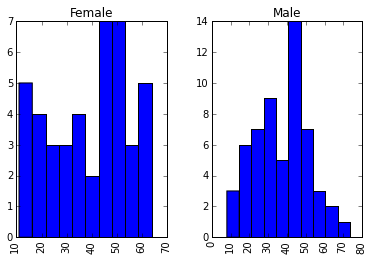

In [18]:
WideCleanData.hist(column="BDI",by="Gender",bins=10)

In [19]:
#write long data to csv
#write to csv
WideCleanData.to_csv('/Users/Paul/Desktop/testwide.csv',index=False)#try na_rep='NaN'
GroupedCleanData.to_csv('/Users/Paul/Desktop/testlong.csv',index=False)
GroupedCleanDataCor = GroupedCleanData[GroupedCleanData.ACC.isin(['Correct'])]
GroupedCleanDataCor.to_csv('/Users/Paul/Desktop/testlongcor.csv',index=False)

In [20]:
import scipy.stats as stats
#The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
#The chance of rejecting the null hypothesis when it is true is close to 5% regardless of sample size.
#Shapiro, S. S. & Wilk, M.B (1965). An analysis of variance test for normality (complete samples), Biometrika, Vol. 52, pp. 591-611.
normtest=stats.shapiro(WideCleanData.BDI)

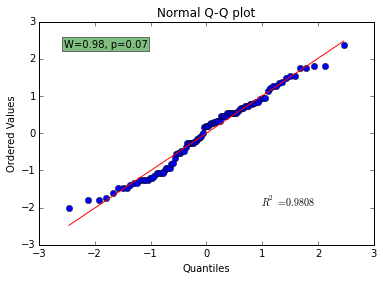

In [21]:
#QQPlots
#stats.zscore(df["a"]) --> does not handle NaNs
zscore = lambda x: (x - stats.nanmean(x)) / stats.nanstd(x)
z=zscore(WideCleanData.BDI)
QQfig=plt.figure()
ax = QQfig.add_subplot(111)
stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
note='W='+str(round(normtest[0],2))+', p='+str(round(normtest[1],2))
plt.text(0.2, 0.9,note, ha='center', va='center', transform=ax.transAxes, bbox=dict(facecolor='green', alpha=.5), color='black')
plt.show()

In [22]:
import pyvttbl
LongDataPT=pyvttbl.DataFrame()
LongDataPT.read_tbl(fname='/Users/Paul/Desktop/testlong.csv',delimiter=',',labels=True)
LongDataCorPT=pyvttbl.DataFrame()
LongDataCorPT.read_tbl(fname='/Users/Paul/Desktop/testlongcor.csv',delimiter=',',labels=True)
WideDataPT=pyvttbl.DataFrame()
WideDataPT.read_tbl(fname='/Users/Paul/Desktop/testwide.csv',delimiter=',',labels=True)

In [23]:
#df[~df.column.isin(value_list)]
#aov=LongDataPT.anova('RT',sub='Participant',bfactors=['Type','Gender','Region',],wfactors=['Condition','ACC'])
aov=LongDataPT.anova('RT',sub='Participant',wfactors=['Condition','ACC'],bfactors=['Gender'])
def extract_for_apa(factor, aov, values = ['F', 'mse', 'eta', 'p']):
    results = {}
    for key,result in aov[(factor,)].iteritems():
        if key in values:
            results[key] = result
            
    return results
#print(aov)
extract_for_apa('Condition',aov)


{'F': 205.62198174601411,
 'eta': nan,
 'mse': 7418.0847348637035,
 'p': 8.386004116930345e-26}

In [139]:
#ANOVA comparing levels of Type and Region
aov=LongDataCorPT.anova('BDI',sub='Participant',bfactors=['Type','Region'])

#Script for printing ANOVA results
effect_stats = ['df','ss','F','p','eta']
import itertools
factorlist=aov.wfactors + aov.bfactors
statdata=[]
for source in range(1, len(factorlist)+1):
    for subset in itertools.combinations(factorlist,source):
        thiseffect=[":".join(list(subset))]
        for effect in effect_stats:
            for key,result in aov[subset].iteritems():
                if key == effect:
                    thiseffect=thiseffect+[round(result,4)]
        statdata.append(thiseffect)
AOVout=pandas.DataFrame(statdata,columns=['Source','DF','SS','F','P','ETA'])
AOVout


,Source,DF,SS,F,P,ETA
0,Type,1,59.9386,0.8232,0.3654,0.0042
1,Region,1,7135.1809,97.9963,0.0000,0.3333
2,Type:Region,1,581.3885,7.9849,0.0052,0.0391


In [504]:
#Cross tabulate
#GroupedCleanDataCor.pivot_table(index=["Gender",'Condition'],columns=['Type','Region'],values=['RT'],aggfunc=lambda x: len(x.unique()))
#aov=LongDataCorPT.anova('RT',sub='Participant',wfactors=['Condition'],bfactors=['Gender'])
#from statsmodels.stats.api import anova_lm
#from statsmodels.formula.api import glm, ols

#model=statsmodels.formula.api.glm('RT~Condition+Gender', data=GroupedCleanDataCor).fit()
#print model1.summary()
#print anova_lm(model1)
n_ws_levels=2
n_bs_levels=2
cell_means=GroupedCleanData.pivot_table(index='Gender',columns='Condition',values='RT',aggfunc=np.nanmean)
ws_cells=GroupedCleanData.pivot_table(index=['Participant'],columns=['Condition'],values='RT',aggfunc=np.sum)**2
bs_cells=GroupedCleanData.pivot_table(index=['Participant'],columns='Gender',values='RT',aggfunc=np.sum)**2
wsbs_cells=GroupedCleanData.pivot_table(index=['Participant'],columns=['Gender','Condition'],values='RT',aggfunc=np.sum)**2
GM = np.mean(GroupedCleanDataCor['RT'])
correction_term = np.sum(GroupedCleanDataCor['RT'])**2 / len(GroupedCleanDataCor['RT']);


#SS_total = np.sum((GroupedCleanDataCor['RT']-GM)**2)
SS_total = np.sum(GroupedCleanData['RT']**2) - correction_term;

#subject "factor" (i.e. differences in subject means)
SSsub = sum(sum(GroupedCleanDataCor[GroupedCleanDataCor['Participant']==thissub]['RT'])**2 for thissub in GroupedCleanDataCor['Participant'].unique())/n_ws_levels - correction_term;

#between-subjects factor
bs_n=bs_cells.count()
SS_bs=np.sum(np.sum(bs_cells)/bs_n)-correction_term
DFbs    = len(bs_cells.columns.values) - 1
MSbs    = SS_bs / DFbs;

#error terms for between-subjects factor
ERRbs   = SSsub - SS_bs
DFERRbs = len(GroupedCleanDataCor['Participant']) - len(bs_cells.columns.values)
MSERRbs = ERRbs / DFERRbs;

#correction with harmonic mean of cell sizes if cell sizes are not all equal
from scipy.stats.mstats import hmean
n_subs=wsbs_cells.count()
n_subs_hm=hmean(wsbs_cells.count())
cell_totals=GroupedCleanData.pivot_table(index=['Condition'],values='RT',aggfunc=np.sum)
cell_totals_hm = (cell_totals/n_subs) * n_subs_hm
correction_term_hm = np.sum(cell_totals_hm)**2 / (n_subs_hm * len(bs_cells.columns.values) * len(ws_cells.columns.values))
#n_subs_per_cell_hm = ones(n_bs_levels,n_ws_levels) * n_subs_hm;
#print(cell_totals.pivot('Condition'))
#within-subjects factor
SSws=np.sum(cell_totals_hm**2)/n_subs_hm - correction_term_hm  
DFws  = len(ws_cells.columns.values) - 1;
MSws  = SSws / DFws;

#uncorrected version of within-subjects factor for calculating interaction
#SStmp=[];
#for j=1:n_ws_levels
#    SStmp(j)=(sum(cell_totals(:,j))^2) ./ sum(n_subs_per_cell(:,j)); %#ok<AGROW>
#end
SSws_unc = np.sum(cell_totals)**2 /- correction_term





#SS_between=np.sum((GroupedCleanData.pivot_table(index='Participant',values='RT',aggfunc=np.nanmean)-GM)**2)
#SS_bx = np.sum([np.mean(GroupedCleanDataCor.RT[GroupedCleanDataCor.Gender == cond]-GM)**2 for cond in GroupedCleanDataCor.Gender.unique()])
#SS_Sbx = SS_between-SS_bx

#SS_wx = np.sum([np.sum((GroupedCleanDataCor.RT[GroupedCleanDataCor.Condition == cond]-GroupedCleanDataCor.RT[GroupedCleanDataCor.Condition == cond].mean())**2) for cond in GroupedCleanDataCor.Condition.unique()])

#x=GroupedCleanData.pivot_table(index='Participant',columns=['Condition','Gender'],values='RT',aggfunc=np.nanmean)
#SS_wx_bx = np.sum([(np.nanmean(x[level])-GM)**2 for level in x.columns])

#SS_Swx_bx = (SS_total-SS_between) - (SS_wx+SS_wx_bx)

#SSw_e = SSw - np.sum([np.mean(GroupedCleanDataCor.RT[GroupedCleanDataCor.Participant == sub]-GM)**2 for sub in GroupedCleanDataCor.Participant.unique()])
#SSb_e = TSS-SSb

#DFT = len(GroupedCleanData.RT)-1
#DFb = len(GroupedCleanData.Gender.unique()) - 1
#DFb_e = len(GroupedCleanData.Gender.unique())*DFT
#DFw = len(GroupedCleanData.Condition.unique())-1
#DFbw = DFb*DFw
#DFbw_e = DFw
#DFe = len(GroupedCleanData.RT)-(len(GroupedCleanData.Gender.unique())*len(GroupedCleanData.Condition.unique()))

#print([TSS,SSw,SSw_e, SSb,SSb_e,DFT,DFb,DFw,DFbw,DFe])
#MSb=SS_bx/DFb
#MSb_e=SS_Sbx/DFb_e
#MSw=SS_wx/DFw
#MSw_e=SS_Swx_bx/DFe

#Fb=MSb/MSb_e
#Fw=MSw/MSw_e
#Fw

# Between-Subject Computations
## Sums of Squares
$$SS_{Total} = \sum_{}X^2 - \frac{(\sum_{}X)^2}{N}$$ 
$$SS_{Treat} = \sum_{}n_b*(\bar{X}_{Treat} - \bar{X}_{Grand})^2$$ 
$$SS_{Error} = \sum{}w*(\bar{X}_i - \bar{X}_b)^2$$

## Degrees of Freedom
$$DF_{Treat} = b-1$$
$$DF_{Error} = N-b$$
## Mean Squares
$$MS_{Treat} = \frac{SS_{Treat}}{DF_{Treat}}$$
$$MS_{Error} = \frac{SS_{Error}}{DF_{Error}} $$

## F Ratio
$$F = \frac{MS_{Treat}}{MS_{Error}}$$

# Within-Subject Computations
## Sums of Squares
$$SS_{Total} = \sum_{}X^2 - \frac{(\sum_{}X)^2}{N}$$
$$SS_{Treat} = \sum_{}n_w*(\bar{X}_{Treat} - \bar{X}_{Grand})^2$$
$$SS_{INT} = \sum_{}n_{bw}*(\bar{X}_{bw} - \bar{X}_b - \bar{X}_w + \bar{X}_{Grand})^2$$
$$SS_{Subjects} = \sum_{}(\bar{X}_{Subjects} - \bar{X}_{Grand})^2$$
$$SS_{Error} = SS_{Total} - SS_{Treat} - SS_{Subjects}$$
$$or$$
$$SS_{Error} = \sum_{}(X - \bar{X}_p - \bar{X}_{bw} + \bar{X}_b)^2$$
## Degrees of Freedom
$$DF_{Treat} = w-1$$
$$DF_{INT} = (b-1)(w-1)$$
$$DF_{Error}=(w-1)(N-b)$$
## Mean Squares
$$MS_{Treat} = \frac{SS_{Treat}}{DF_{Treat}}$$
$$MS_{Error} = \frac{SS_{Error}}{DF_{Error}} $$
## F Ratio
$$F = \frac{MS_{Treat}}{MS_{Error}}$$

In [705]:
from scipy.stats.mstats import hmean
N=len(GroupedCleanDataCor['Participant'].unique())
CM=(np.sum(GroupedCleanDataCor['RT'])**2)/(N*w)

GM = np.nanmean(GroupedCleanDataCor['RT'])
SS_total= np.sum(GroupedCleanDataCor['RT']**2)-CM
ws_cells=GroupedCleanDataCor.pivot_table(index=['Participant'],columns='Condition',values='RT',aggfunc=np.nanmean)
w=len(ws_cells.columns.values)
bs_cells=GroupedCleanDataCor.pivot_table(index=['Participant'],columns='Gender',values='RT',aggfunc=np.nanmean)
b=len(bs_cells.columns.values)
n_b=bs_cells.count()
n_b_hm=hmean(n_b)
n_w=ws_cells.count()

bs_means=GroupedCleanDataCor.pivot_table(index='Gender',values='RT',aggfunc=np.nanmean)
SS_b=np.sum(n_b*w*(bs_means-GM)**2)
SS_b_error=np.sum(np.sum(w*(bs_cells-bs_means)**2))
print(SS_b)
DF_b = b-1
DF_b_error = N-b
MS_b = SS_b/DF_b
MS_b_error = SS_b_error1/DF_b_error
F_b = MS_b/MS_b_error

ws_means=GroupedCleanDataCor.pivot_table(index='Condition',values='RT',aggfunc=np.nanmean)
SS_w=np.sum(n_w*(ws_means-GM)**2) #Type I SS
#SS_w=np.sum(GroupedCleanDataCor.pivot_table(index='Condition',values='RT',aggfunc=np.nanmean)**2)-(np.sum(GroupedCleanDataCor.pivot_table(index='Condition',values='RT',aggfunc=np.nanmean))**2)/2
print(SS_w)
SS_b_error=np.sum(np.sum(w*(bs_cells-bs_means)**2))
DF_b = b-1
DF_b_error = N-b
MS_b = SS_b/DF_b
MS_b_error = SS_b_error1/DF_b_error
F_b = MS_b/MS_b_error

bw_means=GroupedCleanDataCor.pivot_table(index='Condition',values='RT',aggfunc=np.nanmean)


14.8979113244
1050945.35115


In [ ]:
#independent samples t-test with scipy
#import the ttest_ind function from scipy.stats
from scipy.stats import ttest_ind
#use pandas pivot_table to get columns of data
tdata=WideCleanData.pivot_table(index='Participant',columns='Type',values='Age')
#compare two columns....getting rid of NaN values
result=ttest_ind(tdata.Traumatic[~np.isnan(tdata.Traumatic)], tdata.Vascular[~np.isnan(tdata.Vascular)])
print('t='+str(result[0])+', p='+str(result[1]))

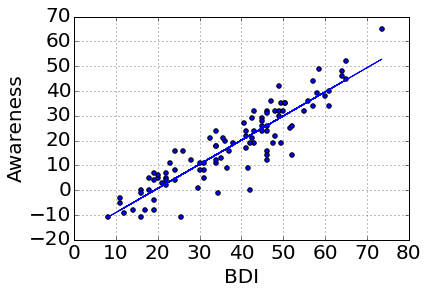

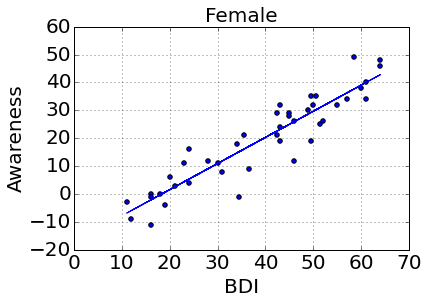

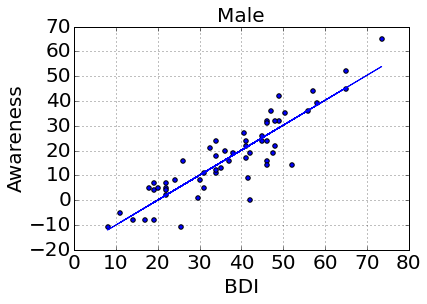

In [221]:
#Pandas scatterplot
#Scatter all subjects
WideCleanData.plot(kind='scatter',x='BDI',y='Awareness',fontsize=20)
#Personalize
plt.xlabel('BDI',fontsize=20)
plt.ylabel('Awareness',fontsize=20)
#Draw line of best fit
plt.plot(WideCleanData.BDI, np.poly1d(np.polyfit(WideCleanData.BDI, WideCleanData.Awareness, 1))(WideCleanData.BDI))

#Make plots for separate groups of cases (e.g., gender)
for gender in WideCleanData.Gender.unique():
    WideCleanData[WideCleanData.Gender==gender].plot(kind='scatter',x='BDI',y='Awareness',fontsize=20)
    plt.xlabel('BDI',fontsize=20)
    plt.ylabel('Awareness',fontsize=20)
    plt.title(gender,fontsize=20)
    plt.plot(WideCleanData[WideCleanData.Gender==gender].BDI, np.poly1d(np.polyfit(WideCleanData[WideCleanData.Gender==gender]
       .BDI, WideCleanData[WideCleanData.Gender==gender].Awareness, 1))(WideCleanData[WideCleanData.Gender==gender].BDI))


In [90]:
#plt.figure()
#test['BDI'].plot()
LongDataCorPT.box_plot(val='RT',factors=['Condition'])
#pylab.show(fig)
#help(LongDataCorPT.box_plot)

In [91]:
#Using Pandas correlation method
r=WideDataPT.correlation(['Age','BDI'])
print(r)

Bivariate Correlations

                        Age      BDI   
Age   pearson               1   -0.113 
      Sig (2-tailed)        .    0.263 
      N                   100      100 
--------------------------------------
BDI   pearson          -0.113        1 
      Sig (2-tailed)    0.263        . 
      N                   100      100 

Larzelere and Mulaik Significance Testing

   Pair       i   Correlation     P     alpha/(k-i+1)   Sig. 
Age vs. BDI   1         0.113   0.263           0.050        


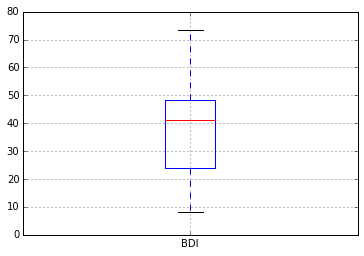

In [126]:
WideCleanData['BDI'].plot(kind='box',by='Gender')
#help(WideCleanData.plot)

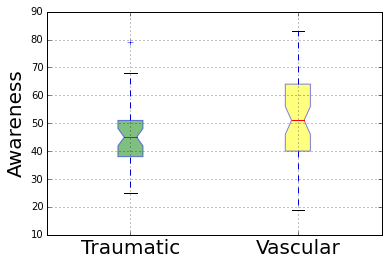

In [205]:
#Boxplots
#1) Use pivot_table method to collect data for boxplots
boxdata=WideCleanData.pivot_table(index='Participant',columns='Type',values='Age',aggfunc=np.nanmean)

#2)Use Pandas boxplot method (handles NaNs) to generate plot
box=boxdata.boxplot(return_type='dict',notch=True, patch_artist=True,fontsize=20)

#3) Personalize
plt.ylabel('Age', fontsize=20)
colors = ['green', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set(facecolor=color, alpha=0.5)

In [109]:
stats.pearsonr(WideCleanData['BDI'],WideCleanData['Awareness'])

(0.90643275998834072, 1.8317486348009246e-38)

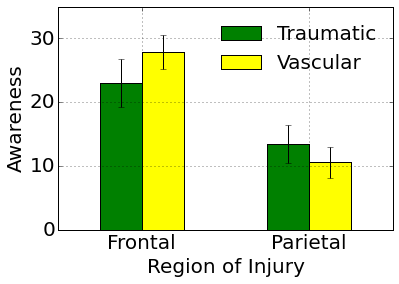

In [235]:
#Generating a Grouped Bar Chart
#1) Get Means for each condition
means=WideCleanData.pivot_table(index='Region',columns='Type',values='Awareness',aggfunc=np.mean)
#2) Get Standard Errors for each condition
errors=WideCleanData.pivot_table(index='Region',columns='Type',values='Awareness',aggfunc=stats.sem)
#3) Use "plot" method of Pandas DataFrame
means.plot(kind='bar', yerr=errors, color=['green','yellow'], rot=0,fontsize=20,alpha=1)
#4) Personalize Figure Options
plt.legend(prop={'size':20},frameon=False)
plt.xlabel('Region of Injury', fontsize=20)
plt.ylabel('Awareness', fontsize=20)
Ymin=0
Ymax=35
stepsize=10
plt.yticks(np.arange(Ymin, Ymax+1, stepsize))
plt.savefig('/Users/Paul/Desktop/test.png')



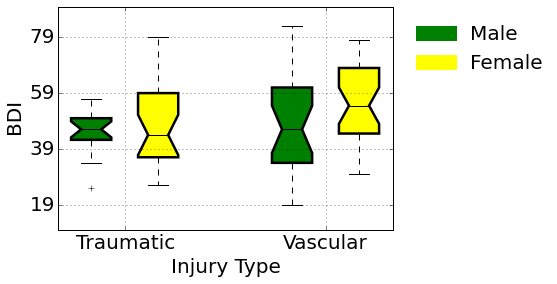

In [352]:
# function for setting the colors of the box plots pairs
def setBoxColors(bp,colors):
    nreps=len(zip(bp['boxes']))/len(colors)
    if nreps>1:
        colors=colors*nreps

    for patch, color, flier in zip(bp['boxes'], colors, bp['fliers']):
        patch.set(facecolor=color, alpha=1,color='black',linewidth=2.5)
        flier.set(color='black')
        
    for cap,whisker in zip(bp['caps'],bp['whiskers']):
        cap.set(color='black')
        whisker.set(color='black')
        
    for median in bp['medians']:
        median.set(color='black')
    
    #setp(bp['boxes'][0], color='blue')
    #setp(bp['caps'][0], color='blue')
    #setp(bp['caps'][1], color='blue')
    #setp(bp['whiskers'][0], color='blue')
    #setp(bp['whiskers'][1], color='blue')
    #setp(bp['fliers'][0], color='blue')
    #setp(bp['fliers'][1], color='blue')
    #setp(bp['medians'][0], color='blue')

    #setp(bp['boxes'][1], color='red')
    #setp(bp['caps'][2], color='red')
    #setp(bp['caps'][3], color='red')
    #setp(bp['whiskers'][2], color='red')
    #setp(bp['whiskers'][3], color='red')
    #setp(bp['fliers'][2], color='red')
    #setp(bp['fliers'][3], color='red')
    #setp(bp['medians'][1], color='red')

boxdata=WideCleanData.pivot_table(index='Participant',columns=['Type','Gender'],values='Age',aggfunc=np.nanmean) 

#fig = plt.figure()
#ax = plt.axes()
#plt.hold(True)

# first boxplot pair
bp = boxdata.boxplot(return_type='dict',notch=True, patch_artist=True,fontsize=20,widths=0.6, positions = [1, 2,4,5])
setBoxColors(bp,colors=['green','yellow'])
plt.ylabel("BDI",fontsize=20)
plt.xlabel("Injury Type",fontsize=20)
plt.xticks([1.5,4.5], ['Traumatic','Vascular'], rotation=0)
plt.yticks(range(int(np.min(np.min(boxdata))),int(np.max(np.max(boxdata))),20),fontsize=20)
green_patch = matplotlib.patches.Patch(color='green', label='Male')
yellow_patch = matplotlib.patches.Patch(color='yellow', label='Female')
plt.legend(ax,handles=[green_patch,yellow_patch],frameon=False,fontsize=20, bbox_to_anchor=(1.5,1))

In [2]:
#boxdata.columns.names
zip(bp['boxes'], colors, bp['fliers'])

NameError: name 'bp' is not defined

In [344]:
dir(box)

['__call__',
 '__class__',
 '__cmp__',
 '__delattr__',
 '__doc__',
 '__format__',
 '__func__',
 '__get__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'im_class',
 'im_func',
 'im_self']